# 인공지능 이해
 - tf.keras.layers.Dense: 신경망을 만들때 사용하는 모듈




## Step1. 신경망

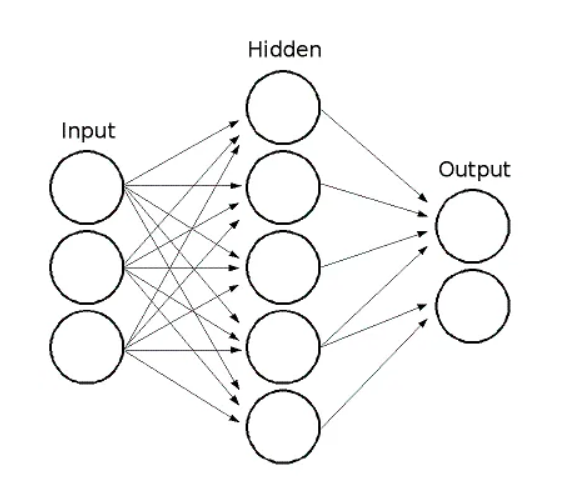

- input=> activation funtion(화살표) => Hidden(output이자 input) => activation function => Output 으로 구성

#### y = f(Wx+b)
- f(): 활성화 함수
- W: 가중치
- x: input data
- y: output data

## Step2. tf.keras.layers.Dense
- 신경망을 이해할 때 사용하는 모듈이 바로 tf.keras.layers.Dense이다. 
- tf.keras.layers.Dense는 input을 넣었을 때 output으로 바꿔주는 중간 다리라고 생각하면 됨

### 사용법

1.객체 생성 후에 입력값 넣기





In [ ]:
dense = tf.keras.layers.Dense(units, ...)
output = dense(input)

2.객체 생성과 입력값을 동시에 넣기

In [ ]:
ouput = tf.keras.layers.Dense(units, ...)(input)

3.Dense에 들어가는 옵션

In [ ]:
    units,
    activation = None,
    use_bias = True,
    kernel_initializer = 'glorot_uniform',
    bias_iniotializer = 'zeros',
    kernel_regularizer = None, 
    bias_regularizer = None,
    activity_regularizer = None,
    kernel_constraint = None,
    bias_constraint = None,
    **kwargs

- units : 출력 값의 크기
- activation : 활성화 함수
- use_bias : 편향(b)을 사용할지 여부
- kernel_initializer : 가중치(W) 초기화 함수
- bias_iniotializer : 편향 초기화 함수
- kernel_regularizer : 가중치 정규화 방법
- bias_regularizer : 편향 정규화 방법
- activity_regularizer : 출력 값 정규화 방법
- kernel_constraint : 가중치에 적용되는 부가적인 제약 함수
- bias_constraint : 편향에 적용되는 부가적인 제약 함수

## Step3. 예시

1.keras의 models과 layers라는 이름을 가진 라이브러리 내의 Sequential과 Dense라는 오브젝트를 사용하기 위해 각각 모델들을 임포트

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

2. 연습용 입력데이터와 출력데이터 생셩
- 데이터들의 최적의 w는 1

In [ ]:
x = np.array([1,2,3,4,5])
y = np.array([1,2,3,4,5])

3.Seqeuntial모델 오브젝트를 model이라는 변수 안에 넣고, 모델 구성을 시작

In [ ]:
model = Sequential()
model.add(Dense(5, input_dim=1, activation='relu'))
# input 1 output 5
# input_dim = 1, 입력 차원이 1이라는 뜻이며 입력 노드가 한개라고 생각하면 됨, 
# 만약 x배열의 데이터가 2개라면 2, 3개라면 3으로 지정
# 그 다음, 만든 시퀀스 오브젝트 model에 5개의 노드를 Dense레이어를 통해 연결
# add를 통해 하나의 레이어를 추가

# Dense 레이어는 입력과 출력을 모두 연결해주며 입력과 출력을 각각 연결해주는 가중치를 포함하고 있음
# 입력이 3개 출력이 4개라면 가중치는 총 3X4인 12개가 존재
# Dense레이어는 머신러닝의 기본층으로 영상이나 서로 연속적으로 상관관계가 있는 데이터가 아니라면 
# Dense레이어를 통해 학습시킬 수 있는 데이터가 많다는 뜻

- Dense의 첫번째 인자 : 출력 뉴런(노드)의 수를 결정
- Dense의 두번째 인자 : input_dim은 입력 뉴런(노드)의 수를 결정, 맨 처음 입력층에서만 사용
- Dense의 세번째 인자 : activation 활성화 함수를 선택

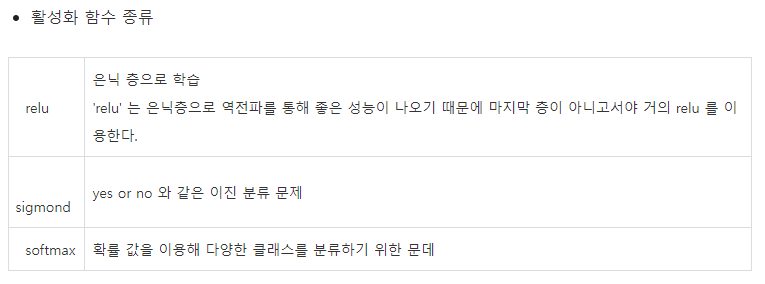

In [ ]:
model.add(Dense(3))
# 두번째 레이어의 노드의 갯수는 3개

model.add(Dense(1))
# 마지막 레이어의 노드의 갯수는 출력 데이터 y의 갯수와 동일하게 1개로 지정

이렇게 만들어진 시퀀스 모델의 대략적인 모양

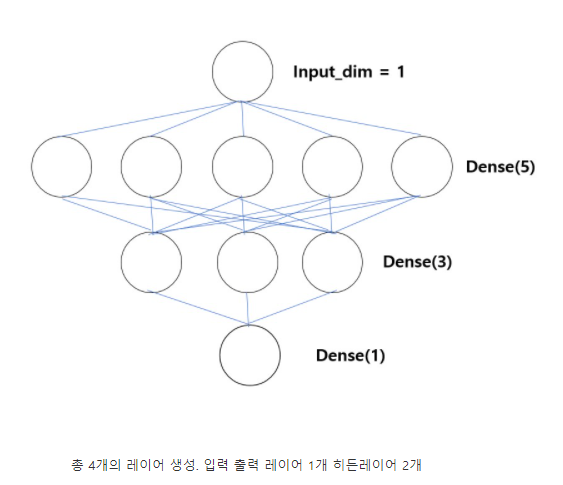

In [ ]:
# 만들어진 모델을 컴파일
model.compile(loss='mse', optimizer='adam')
# loss는 손실함수를 의미, 얼마나 입력데이터가 출력데이터와 일치하는지 평가해주는 함수
# 손실함수를 'mse'를 사용하겠다는 의미가 됩니다. mse는 평균제곱오차(mean squared error)를 의미
# 얼마나 예측과 다른지 평가해주는 값/예측값과의 차이를 의미하므로 작으면 작을수록 좋은 모델이라는 의미
# 참조: https://keras.io/losses/

# optimizer는 손실 함수를 기반으로 네트워크가 어떻게 업데이트될지 결정
# 옵티마이저 종류: https://keras.io/ko/optimizers/

model.fit(x, y, epochs=100, batch_size=1)
# 파일한 모델 훈련
# 입력데이터와 출력데이터를 인자로 넣고, epochs = 100, 100번 훈련을 시킨다는 의미
# batch_size는 작업단위를 의미, 1차 함수를 100번 그린 것 중 1개씩 잡아서 작업, 
# 배치사이즈의 디폴트 값은 32
 
mse = model.evaluate(x, y, batch_size=1)
# 배치사이즈를 1로 잡아 손실 함수를 계산

print('mse : ', mse)

- mse값을 더 좋게 만드는 것이 사람이 해주는 일
- 하이퍼파라미터 튜닝 
 - 파라미터: 가중치(Weight), 편향(Bias) 같은 학습 과정에서 모델이 자동으로 업그레이드하며 갱신하는 값
 - 참조:https://sy-programmingstudy.tistory.com/9